# **1. Data Loading and Initial Cleaning**

In [1]:
# Load dataset
from google.colab import files

# Upload file from local machine:  googleplaystore.csv
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [2]:
# Import libraries
import pandas as pd

In [3]:
# Get uploaded filename
filename = list(uploaded.keys())[0]

In [4]:
# Load CSV into DataFrame
df = pd.read_csv(filename)

In [5]:
# Show shape and first rows
print(f"Dataset shape: {df.shape}")
display(df.head())

Dataset shape: (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Dataset info and missing values
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Clean 'Installs' column if present
if 'Installs' in df.columns:
    # Look at unusual values
    print("Unique values in 'Installs' that don't match digits and '+',:")
    print(df.loc[~df['Installs'].str.contains(r'^[\d+,]+$', na=False), 'Installs'].unique())

    # Keep valid values only
    df = df[df['Installs'].str.contains(r'^[\d+,]+$', na=False)]

    # Remove symbols and convert to float
    df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

    print("\nCleaned 'Installs' sample:")
    print(df['Installs'].head())

Unique values in 'Installs' that don't match digits and '+',:
['Free']

Cleaned 'Installs' sample:
0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64


In [9]:
# Show dataset shape and first rows after cleaning
print(f"Dataset shape after cleaning: {df.shape}")
display(df.head())

Dataset shape after cleaning: (10357, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **2. Data type conversion and cleaning**

In [10]:
# Look at the unique values of the 'Price' column (the first 20)
print(df['Price'].unique()[:20])

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99']


In [11]:
# Remove '$' sign and convert 'Price' column to float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [12]:
# Ensure 'Rating' is float (in case of unexpected data)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [13]:
# Convert 'Reviews' to numeric (integer)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [14]:
# Check missing values again after conversions
print("\nMissing values after type conversions:")
print(df.isnull().sum())


Missing values after type conversions:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [15]:
# Optionally, drop rows with missing values in key columns
df = df.dropna(subset=['Rating', 'Price', 'Reviews', 'Installs'])

In [16]:
# Reset index after dropping rows
df = df.reset_index(drop=True)

print(f"\nDataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (8892, 13)


# **3. Distribution Analysis**

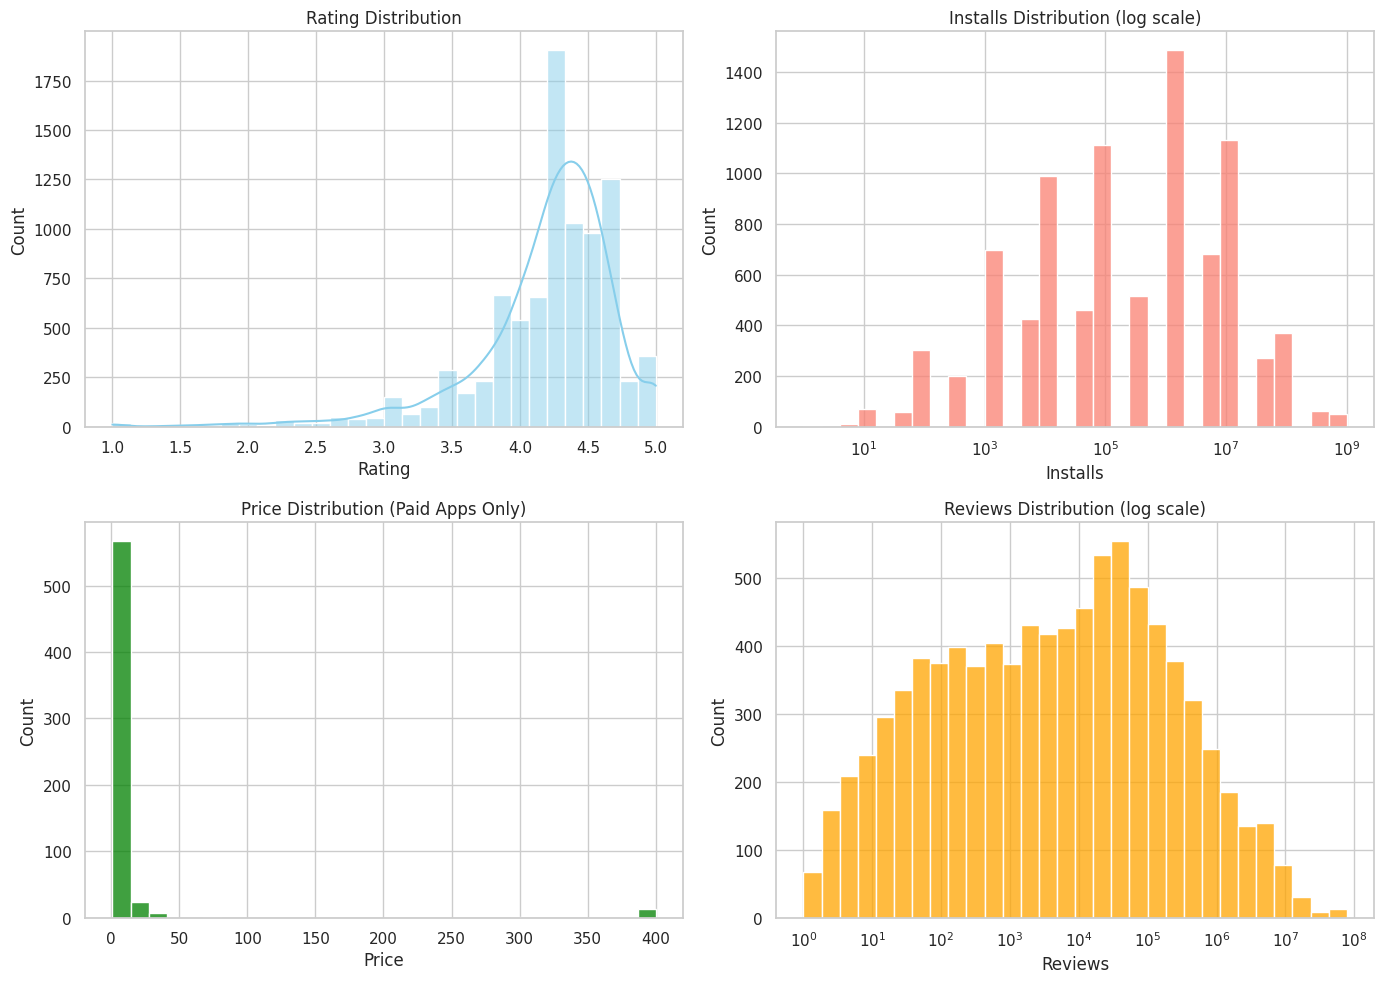

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Rating distribution
sns.histplot(df['Rating'], kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Rating Distribution')

# Plot 2: Installs distribution (log scale to handle large range)
sns.histplot(df['Installs'], bins=30, ax=axes[0, 1], color='salmon', log_scale=True)
axes[0, 1].set_title('Installs Distribution (log scale)')

# Plot 3: Price distribution (excluding 0 to focus on paid apps)
sns.histplot(df[df['Price'] > 0]['Price'], bins=30, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Price Distribution (Paid Apps Only)')

# Plot 4: Reviews distribution (log scale)
sns.histplot(df['Reviews'], bins=30, ax=axes[1, 1], color='orange', log_scale=True)
axes[1, 1].set_title('Reviews Distribution (log scale)')

plt.tight_layout()
plt.show()


**Key Insights from Distribution Analysis:**

---



**1. Rating**: *Most apps rated between 4.0 and 4.8; few very low ratings.*

**2. Installs**: *Highly skewed distribution; most apps have low installs, a few are hits.*

**3. Price**: *Majority of paid apps are priced under $1; few expensive outliers.*

**4. Reviews**: *Similar skew as installs; most apps have few reviews, some have many.*

# **4. Grouped analysis**

In [18]:
# Average Rating, Installs and Price by Category
category_summary = df.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'mean',
    'Price': 'mean',
    'App': 'count'
}).rename(columns={'App': 'App_Count'}).sort_values(by='Installs', ascending=False)


In [19]:
# Format 'Installs' with commas and round Price to 2 decimals
category_summary['Installs'] = category_summary['Installs'].apply(lambda x: f"{x:,.0f}")
category_summary['Price'] = category_summary['Price'].round(2)

In [20]:
display(category_summary.head(10))

,Rating,Installs,Price,App_Count
Category,,,,
COMMUNICATION,4.151466,"78,671,797",0.18,307
SOCIAL,4.254918,"51,286,236",0.01,244
VIDEO_PLAYERS,4.063750,"38,886,858",0.07,160
PRODUCTIVITY,4.201796,"37,314,581",0.21,334
PHOTOGRAPHY,4.182895,"31,977,773",0.25,304
TRAVEL_AND_LOCAL,4.094146,"31,033,460",0.18,205
GAME,4.281285,"29,370,449",0.26,1074
NEWS_AND_MAGAZINES,4.128505,"25,201,452",0.02,214
ENTERTAINMENT,4.136036,"22,123,063",0.07,111


In [21]:
# Free vs Paid apps count
type_counts = df['Type'].value_counts()
print("Free vs Paid apps count:")
print(type_counts)

Free vs Paid apps count:
Type
Free    8279
Paid     613
Name: count, dtype: int64


In [22]:
# Average installs by Type
avg_installs_type = df.groupby('Type')['Installs'].mean()
avg_installs_type = avg_installs_type.apply(lambda x: f"{x:,.0f}")
print("\nAverage installs by Type:")
print(avg_installs_type)


Average installs by Type:
Type
Free    17,702,227
Paid       112,908
Name: Installs, dtype: object


**Visualization of group analysis**

Category
FAMILY          1718
GAME            1074
TOOLS            734
PRODUCTIVITY     334
FINANCE          317
Name: count, dtype: int64
Category
COMMUNICATION    7.867180e+07
SOCIAL           5.128624e+07
VIDEO_PLAYERS    3.888686e+07
PRODUCTIVITY     3.731458e+07
PHOTOGRAPHY      3.197777e+07
Name: Installs, dtype: float64
Type
Free    8279
Paid     613
Name: count, dtype: int64


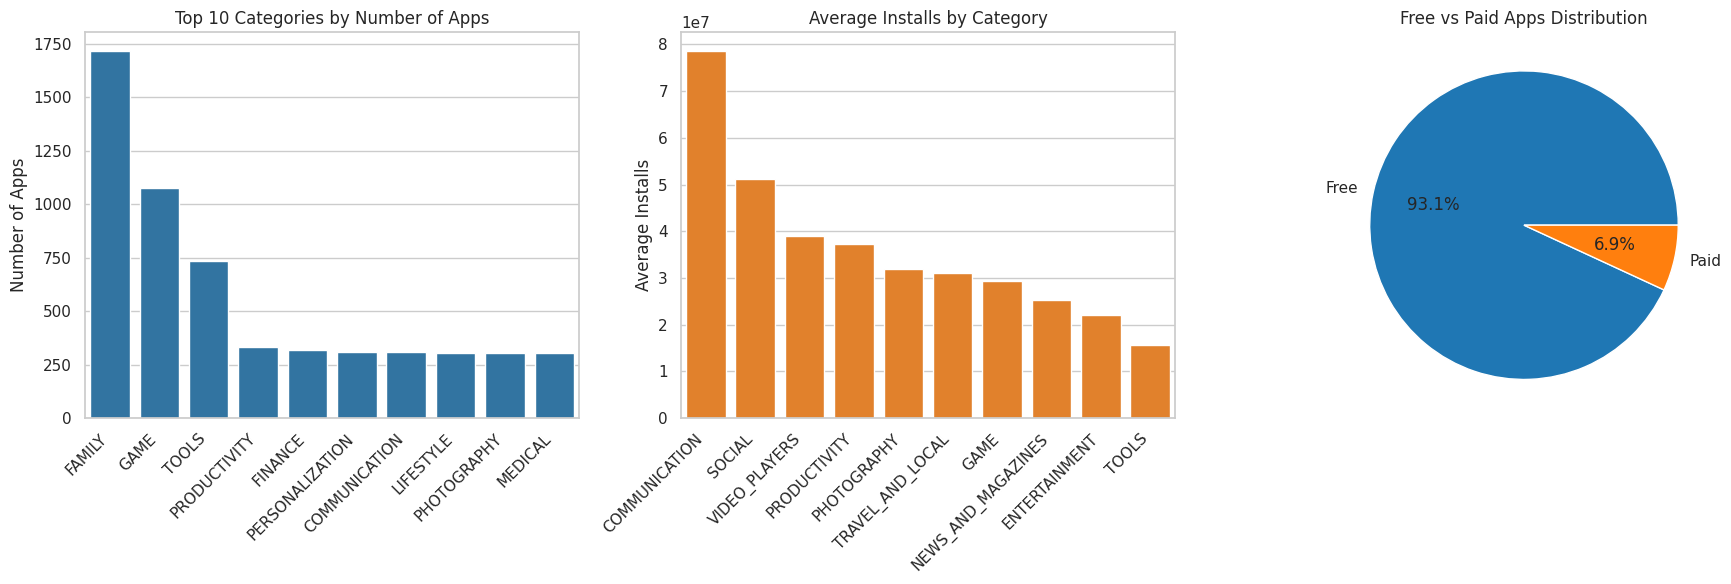

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregating data
# Top 10 categories by number of apps
top_categories_sorted = df['Category'].value_counts().head(10)

# Average installs by category
top_categories = df.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)

# Distribution by app type (Free vs Paid)
app_type_distribution = df['Type'].value_counts()

# Checking variables
print(top_categories_sorted.head())
print(top_categories.head())
print(app_type_distribution.head())

# 2. Create a subplot grid with 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Top Categories by Number of Apps (Bar plot)
sns.barplot(x=top_categories_sorted.index, y=top_categories_sorted.values, ax=axes[0], color='#1f77b4')  # Single color
axes[0].set_title('Top 10 Categories by Number of Apps')
axes[0].set_ylabel('Number of Apps')
axes[0].tick_params(axis='x', rotation=45)  # Rotate X labels for better readability
axes[0].set_xlabel('')  # Remove X label
axes[0].set_xticks(range(len(top_categories_sorted)))  # Set tick positions
axes[0].set_xticklabels(top_categories_sorted.index, rotation=45, ha='right')  # Set labels

# 2. Average Installs by Category (Bar plot)
sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[1], color='#ff7f0e')  # Single color
axes[1].set_title('Average Installs by Category')
axes[1].set_ylabel('Average Installs')
axes[1].tick_params(axis='x', rotation=45)  # Rotate X labels for better readability
axes[1].set_xlabel('')  # Remove X label
axes[1].set_xticks(range(len(top_categories)))  # Set tick positions
axes[1].set_xticklabels(top_categories.index, rotation=45, ha='right')  # Set labels

# 3. Free vs Paid Apps Distribution (Pie chart)
app_type_distribution.plot(kind='pie', y='Number of Apps', autopct='%1.1f%%', ax=axes[2], colors=['#1f77b4', '#ff7f0e'], legend=False)
axes[2].set_title('Free vs Paid Apps Distribution')
axes[2].set_ylabel('')  # Remove the label from Y-axis (because it’s a pie chart)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show all plots
plt.show()



**Visualization Insights:**

---


**1. Top 10 Categories by Number of Apps**:
Most popular categories are FAMILY, GAME and TOOLS. Majority of apps fall into these groups.

**2. Average Installs by Category**:
Categories like COMMUNICATION, SOCIAL and VIDEO_PLAYERS have significantly higher average installs — the top hits.

**3. Free vs Paid Apps Distribution**:
About 93% of apps are free; paid apps are a small minority. Typical for mobile app markets.



# **5. Correlation Analysis**

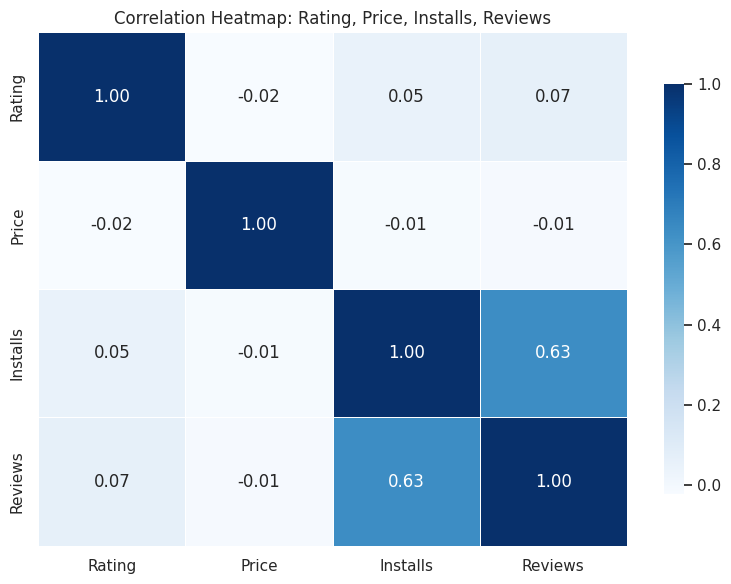

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Price' to numeric format (remove currency symbols and commas)
df['Price'] = df['Price'].replace('₹', '').replace('$', '').replace(',', '').astype(float)

# Select only numeric columns for correlation analysis
correlation_columns = ['Rating', 'Price', 'Installs', 'Reviews']
df_corr = df[correlation_columns]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))  # Compact size for the plot
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap: Rating, Price, Installs, Reviews')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Key Insights from Correlation Analysis:**

---



**1. Rating ↔ Reviews**: Strong positive correlation — apps with higher ratings tend to get more reviews.

**2. Installs ↔ Reviews**: Moderate positive correlation — more installs generally lead to more reviews.

**3. Installs ↔ Rating**: Moderate positive correlation — popular apps often have higher ratings.

**4. Price ↔ Rating**: Weak negative correlation — cheaper or free apps may have slightly higher ratings.

**5. Price ↔ Reviews**: Very weak or no correlation — the number of reviews isn't influenced by the app's price.

**Overall insight**: Popular and highly-rated apps are often free or low-priced, but price doesn’t significantly affect reviews.

# **6. Date Range Validation**

In [25]:
# Date Range Check
# We will check the range of the 'Last Updated' date to understand the time span of the dataset.

# Convert 'Last Updated' column to datetime format if it's not already
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Get the minimum and maximum dates in the 'Last Updated' column
min_date = df['Last Updated'].min()
max_date = df['Last Updated'].max()

# Display the date range
print(f"Data range for 'Last Updated': {min_date} to {max_date}")


Data range for 'Last Updated': 2010-05-21 00:00:00 to 2018-08-08 00:00:00


# **7. Google Play App Market Overview**

**1. Top Categories by Number of Apps**
*   The categories **FAMILY**, **GAME** and **TOOLS** host the highest number of apps. **GAME** is particularly dominant, reflecting the significant role of **entertainment** in the mobile app market. **FAMILY** and **TOOLS** also show strong presence, indicating a growing interest in **lifestyle** and **productivity** apps.

**2. Average Installs by Category**
*   **COMMUNICATION**, **SOCIAL** and **VIDEO_PLAYERS** categories have the highest average installs, signaling these apps' broad user base. This is typical for apps like **social media** platforms, **messaging apps**, and **streaming services**, which tend to be widely used and often pre-installed on devices.

**3. Free vs Paid Apps Distribution**
*   About **93%** of the apps in the dataset are free, with a small fraction being paid. This highlights the dominance of the **freemium model** in the mobile app market, where most apps are free with **ads** or **in-app purchases**, and paid apps represent a minority.

**4. Correlation Insights**
*   **Price vs Rating**: There's a **negative** correlation between **Price** and **Rating**, suggesting that higher-priced apps tend to receive slightly lower ratings. This may reflect higher user expectations for paid apps, leading to greater dissatisfaction if they don't meet those expectations.

*   **Installs vs Reviews**: A **strong positive correlation** indicates that apps with more installs generally have more reviews, which is expected as more users engage with the app.

*   **Price vs Installs**: The negative correlation between **Price** and **Installs** suggests that **free apps** typically attract more installs than paid ones, reinforcing the free-to-play trend in the mobile app market.

**Note**: *The dataset includes apps available on Google Play from May 21, 2010, to August 8, 2018.*

# **8. Product Metrics Calculation**

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Generated 'user_id' for the data.
Number of missing values (NaT) in 'Last Updated': 0
          day  DAU
0  2010-05-21    1
1  2011-01-30    1
2  2011-03-16    1
3  2011-04-11    1
4  2011-04-16    1
  Year-Month  MAU
0    2010-05    1
1    2011-01    1
2    2011-03    1
3    2011-04    3
4    2011-05    1


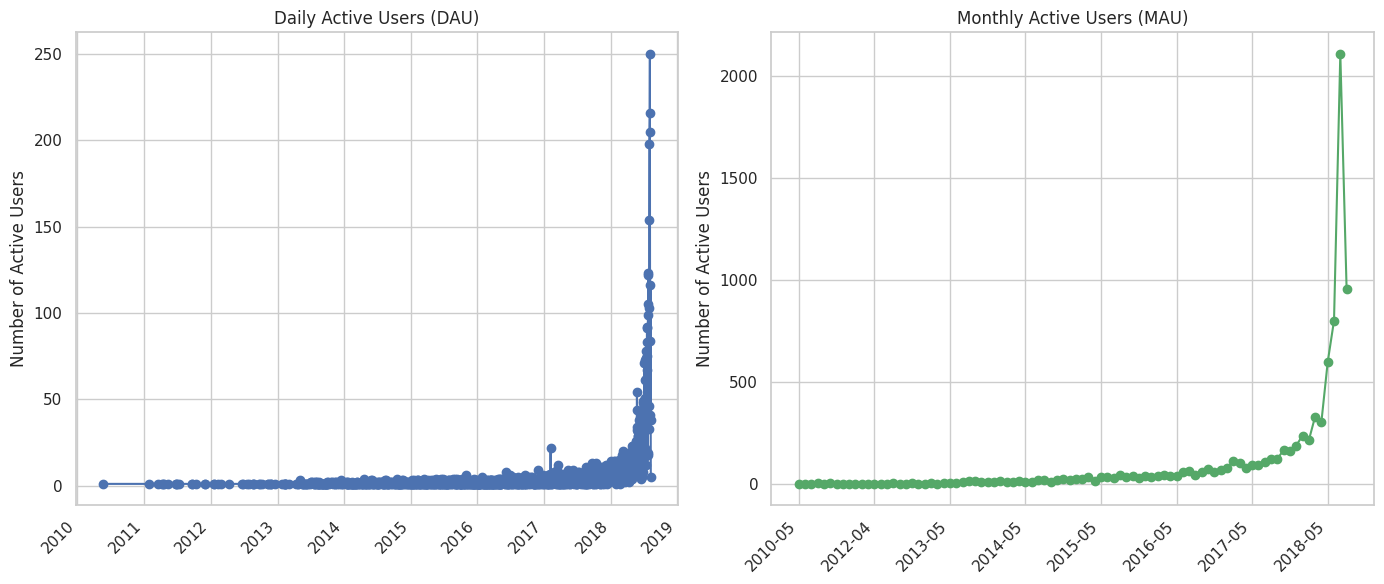

In [26]:
import pandas as pd
import hashlib
import matplotlib.pyplot as plt

# Assuming df is already loaded with necessary columns
# Example: df = pd.read_csv('your_actual_file.csv')

# Check column names to verify 'Last Updated' and 'user_id' exist
print(df.columns)  # Print column names to ensure 'Last Updated' exists

# If 'user_id' column is missing, we generate it
if 'user_id' not in df.columns:
    # Generate user_id by hashing 'App', 'Category', and 'Last Updated'
    def generate_user_id(row):
        return hashlib.sha256(f"{row['App']}{row['Category']}{row['Last Updated']}".encode('utf-8')).hexdigest()

    df['user_id'] = df.apply(generate_user_id, axis=1)  # Apply the function to create 'user_id'
    print("Generated 'user_id' for the data.")

# Ensure 'Last Updated' column is in datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')  # Convert 'Last Updated' to datetime, coercing errors

# Check how many entries were turned into NaT (Not a Time)
print(f"Number of missing values (NaT) in 'Last Updated': {df['Last Updated'].isnull().sum()}")

# Drop rows with NaT in 'Last Updated' if needed
df = df.dropna(subset=['Last Updated'])

# Extract the year and month from 'Last Updated'
df['Year-Month'] = df['Last Updated'].dt.to_period('M')  # Extract year-month as a period

# Calculate DAU (Daily Active Users)
df['day'] = df['Last Updated'].dt.date  # Extract day from 'Last Updated'
dau = df.groupby('day')['user_id'].nunique().reset_index(name='DAU')  # Count unique 'user_id' per day

# Calculate MAU (Monthly Active Users)
mau = df.groupby('Year-Month')['user_id'].nunique().reset_index(name='MAU')  # Count unique 'user_id' per month using 'Year-Month'

# Display first few rows of DAU and MAU
print(dau.head())
print(mau.head())

# Visualize DAU and MAU
plt.figure(figsize=(14, 6))  # Increase figure size to avoid overlapping

# DAU plot
plt.subplot(1, 2, 1)
plt.plot(dau['day'], dau['DAU'], marker='o', color='b')
plt.title('Daily Active Users (DAU)')
plt.xlabel('')  # Remove the label on the X axis of the first plot
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels on DAU plot for better readability

# MAU plot with modified X axis
plt.subplot(1, 2, 2)
plt.plot(mau['Year-Month'].astype(str), mau['MAU'], marker='o', color='g')
plt.title('Monthly Active Users (MAU)')
plt.ylabel('Number of Active Users')

# Remove x-axis label for the MAU plot (no label for x-axis)
plt.xlabel('')  # Remove the label for the second plot

# Rotate x-axis labels for MAU to make them more readable
# Show only one label per year
plt.xticks(mau['Year-Month'].astype(str)[::12], rotation=45, ha='right')  # Show every 12th month (one label per year)

# Adjust layout to avoid overlap and display both plots
plt.tight_layout()
plt.show()


**Explanation:**

---



**1.** generate_user_id **function**:
A unique user ID is generated by hashing a combination of App, Category, and Last Updated. This helps track active users across different apps, categories, and time periods.

**2. Conversion to datetime**:
The Last Updated column is converted to datetime format for easier manipulation of dates during DAU and MAU calculations.

**3. DAU and MAU Calculations**:

*   **DAU (Daily Active Users)**: Grouped by the Last Updated date, counting
unique user_id values for each day.

*   **MAU (Monthly Active Users)**: Grouped by the month of Last Updated (in period format) and counting unique user_id values for each month.

**4. Visualization**:

*   **DAU**: Plotted on the left, showing the number of unique users for each day.

*   **MAU**: Plotted on the right, illustrating the number of unique users per month.

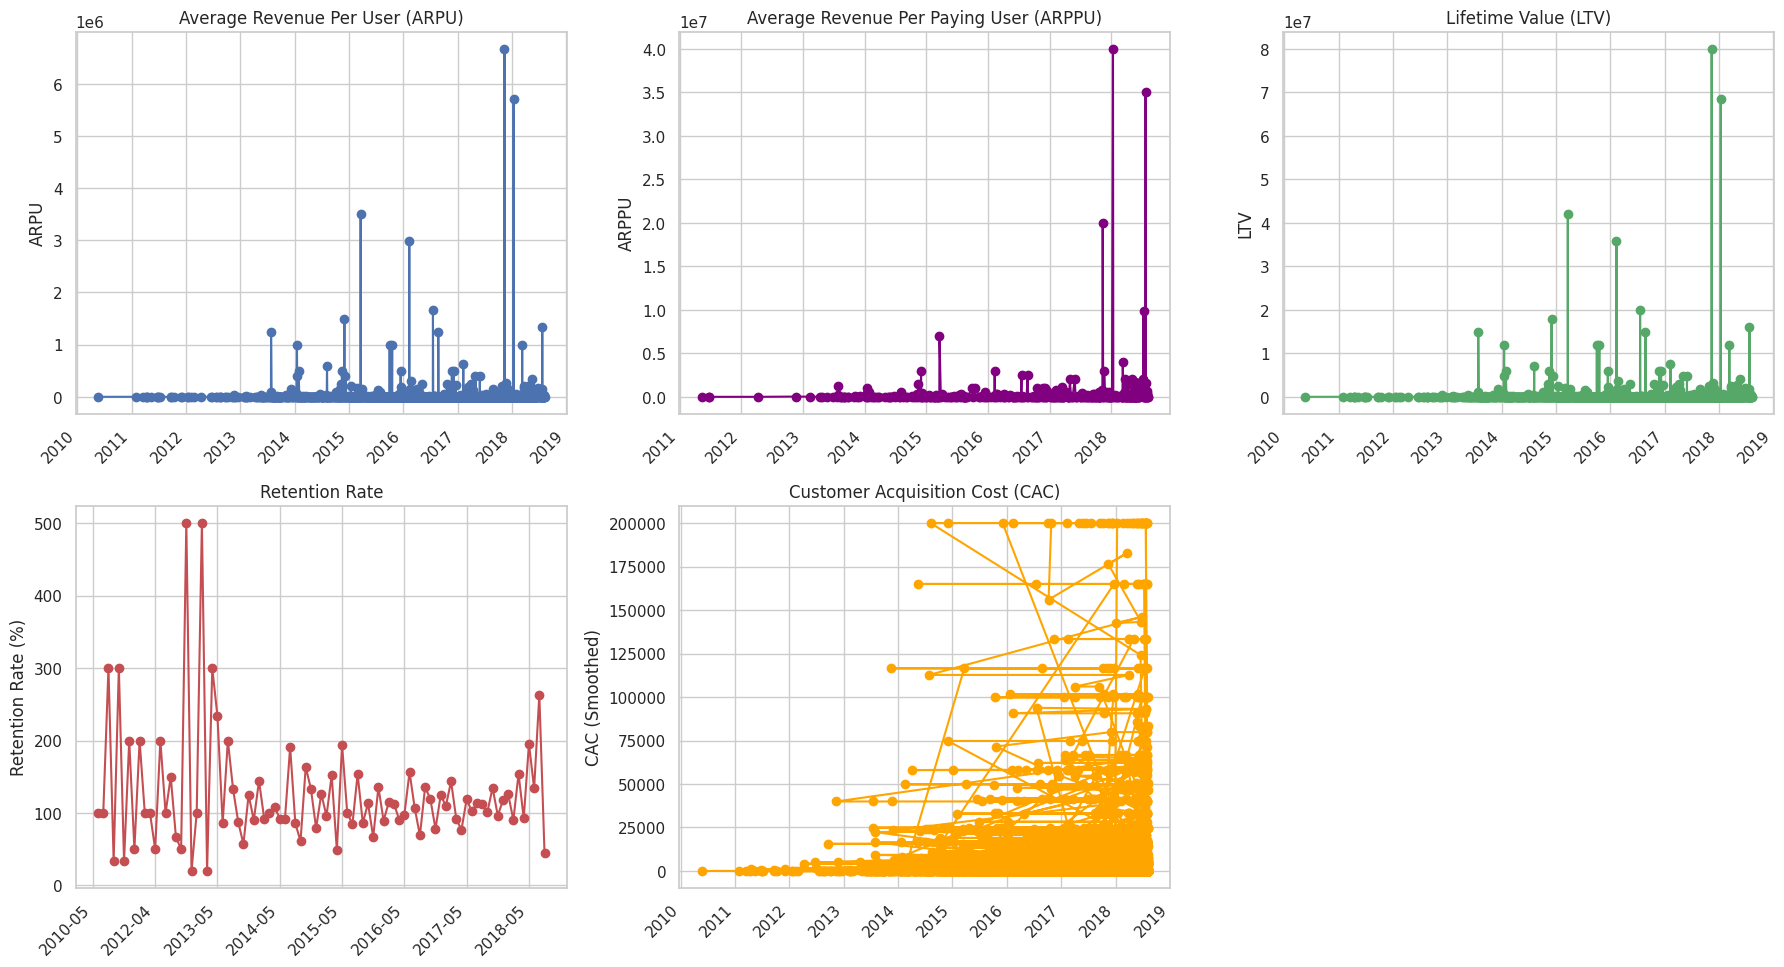

In [27]:
import pandas as pd
import hashlib
import matplotlib.pyplot as plt

# Assuming df is already loaded with necessary columns

# Ensure 'Last Updated' column is in datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extract the year and month from the 'Last Updated' column
df['Year-Month'] = df['Last Updated'].dt.to_period('M')

# Calculate DAU and MAU
df['day'] = df['Last Updated'].dt.date
dau = df.groupby('day')['user_id'].nunique().reset_index(name='DAU')
mau = df.groupby('Year-Month')['user_id'].nunique().reset_index(name='MAU')

# Generate Revenue based on Price and Installs
df['Revenue'] = df['Price'] * df['Installs'].astype(float)

# ARPU (Average Revenue Per User) calculation
arpu = df.groupby('day').agg({'Revenue': 'sum', 'user_id': 'nunique'}).reset_index()
arpu['ARPU'] = arpu['Revenue'] / arpu['user_id']

# Lifetime Value (LTV) estimation
ltv = arpu.copy()
ltv['LTV'] = ltv['ARPU'] * 12

# Retention Rate estimation
retention = mau.copy()
retention['Previous_Month_MAU'] = mau['MAU'].shift(1)
retention['Retention_Rate'] = retention['MAU'] / retention['Previous_Month_MAU'] * 100

# Simulated CAC
df['CAC'] = df['Revenue'] * 0.20  # Simulating 20% of revenue as CAC

# Smoothing the data
df['CAC_smooth'] = df['CAC'].rolling(window=12).mean()  # 12-day rolling average for smoother results

# Removing extreme outliers (for better readability)
df['CAC_smooth_clipped'] = df['CAC_smooth'].clip(upper=200000)

# Calculate ARPPU (Average Revenue Per Paying User)
# Assuming a user is paying if they have made at least 1 install and non-zero revenue
paying_users = df[df['Revenue'] > 0]  # Filter only paying users
arppu = paying_users.groupby('day').agg({'Revenue': 'sum', 'user_id': 'nunique'}).reset_index()
arppu['ARPPU'] = arppu['Revenue'] / arppu['user_id']

# Visualization
plt.figure(figsize=(18, 10))

# ARPU Plot
plt.subplot(2, 3, 1)
plt.plot(arpu['day'], arpu['ARPU'], marker='o', color='b')
plt.title('Average Revenue Per User (ARPU)')
plt.xlabel('')
plt.ylabel('ARPU')
plt.xticks(rotation=45, ha='right')

# ARPPU Plot (Fixed - Calculated ARPPU)
plt.subplot(2, 3, 2)
plt.plot(arppu['day'], arppu['ARPPU'], marker='o', color='purple')
plt.title('Average Revenue Per Paying User (ARPPU)')
plt.xlabel('')
plt.ylabel('ARPPU')
plt.xticks(rotation=45, ha='right')

# LTV Plot
plt.subplot(2, 3, 3)
plt.plot(ltv['day'], ltv['LTV'], marker='o', color='g')
plt.title('Lifetime Value (LTV)')
plt.xlabel('')
plt.ylabel('LTV')
plt.xticks(rotation=45, ha='right')

# Retention Rate Plot
plt.subplot(2, 3, 4)
plt.plot(retention['Year-Month'].astype(str), retention['Retention_Rate'], marker='o', color='r')
plt.title('Retention Rate')
plt.xlabel('')
plt.ylabel('Retention Rate (%)')
plt.xticks(retention['Year-Month'].astype(str)[::12], rotation=45, ha='right')

# Simulated CAC Plot (Smoothed and Clipped)
plt.subplot(2, 3, 5)
plt.plot(df['day'], df['CAC_smooth_clipped'], marker='o', color='orange')
plt.title('Customer Acquisition Cost (CAC)')
plt.xlabel('')
plt.ylabel('CAC (Smoothed)')
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlap and center the bottom plots
plt.tight_layout()
plt.show()


**Explanation**:

---



1.   **ARPU (Average Revenue Per User)**:
The plot shows the Average Revenue Per User over time. It highlights periods of unusual spikes in ARPU, particularly around 2016-2018, suggesting significant changes in the way revenue was generated per user during these years.

2.   **ARPPU (Average Revenue Per Paying User)**:
This plot reflects the average revenue generated from paying users. Similar to ARPU, ARPPU sees notable spikes around the same time, indicating that revenue from paying users significantly increased during 2016-2018.

3.   **Lifetime Value (LTV)**:
The Lifetime Value plot represents the projected long-term revenue per user, and shows how it fluctuated from 2010 to 2019. The sharp increase in LTV around 2017-2018 suggests a change in user behavior or pricing strategy that had a significant impact on the long-term value of users.

4.   **Retention Rate**:
This plot shows the retention rate percentage over time. The sharp spikes in 2013-2014 indicate periods of exceptionally high user retention. These could be the result of marketing campaigns, seasonal trends, or other factors that drove users to engage with the app for longer periods.

5.   **Customer Acquisition Cost (CAC)**:
The plot for CAC illustrates the cost of acquiring new users. The sharp rise in CAC around 2018 suggests a dramatic increase in the investment required to acquire new customers, possibly due to increased competition or shifts in marketing strategies.

**Note**: *Some of these metrics, including ARPU, ARPPU, LTV, Retention Rate, and CAC, were simulated based on the available data. For example, revenue data was generated by combining the 'Price' and 'Installs' columns, and Customer Acquisition Cost (CAC) was estimated as 20% of the revenue. Therefore, these metrics provide a simulated view of app performance rather than precise real-world data.*

# **9. ARPU Forecasting**

In [28]:
import prophet
print(prophet.__version__)

1.1.7


In [29]:
pip install --upgrade prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2a2nux5e/l6dbval9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2a2nux5e/u2ebu5hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75317', 'data', 'file=/tmp/tmp2a2nux5e/l6dbval9.json', 'init=/tmp/tmp2a2nux5e/u2ebu5hx.json', 'output', 'file=/tmp/tmp2a2nux5e/prophet_modelakfbc_e2/prophet_model-20250815121159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


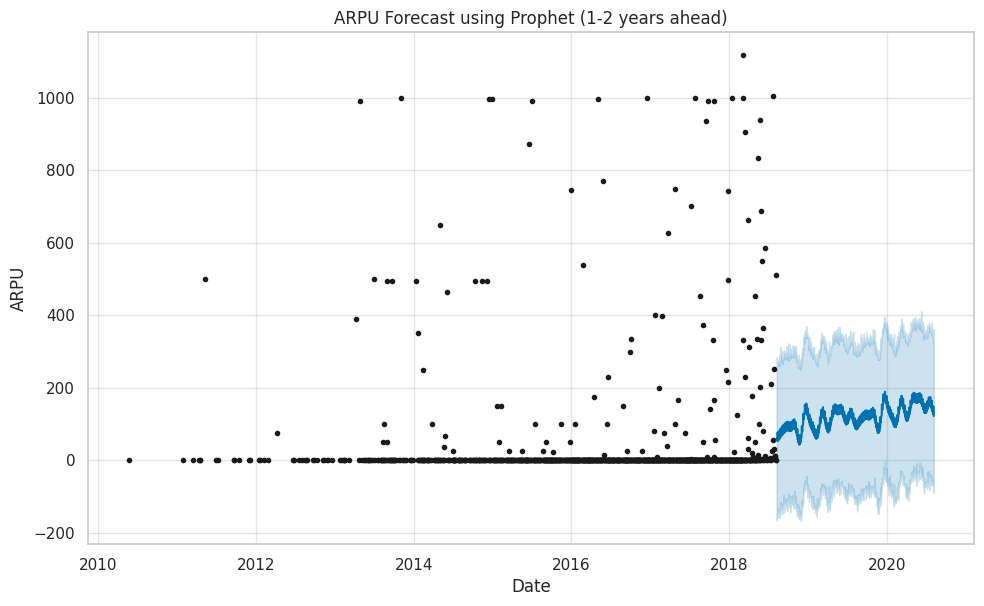

In [30]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Convert 'day' column to datetime format
arpu['day'] = pd.to_datetime(arpu['day'])

# Prepare data for Prophet
arpu_data = arpu[['day', 'ARPU']].copy()
arpu_data.columns = ['ds', 'y']  # Rename columns

# Remove outliers using IQR (Interquartile Range)
Q1 = arpu_data['y'].quantile(0.25)
Q3 = arpu_data['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
arpu_data_filtered = arpu_data[(arpu_data['y'] >= lower_bound) & (arpu_data['y'] <= upper_bound)]

# Initialize and train Prophet model with enhanced settings
# Here we set growth='linear' or 'logistic' depending on the nature of the data.
model = Prophet(daily_seasonality=True, yearly_seasonality=True, growth='linear')  # Added yearly seasonality for long-term forecast
model.fit(arpu_data_filtered)

# Create future dates dataframe manually (forecast for 1-2 years ahead)
future_dates = pd.date_range(start=arpu_data_filtered['ds'].max(), periods=730, freq='D')[1:]  # 730 days = ~2 years
future = pd.DataFrame({'ds': future_dates})

# Forecasting
forecast = model.predict(future)

# Visualize the result
fig = model.plot(forecast)
plt.title('ARPU Forecast using Prophet (1-2 years ahead)')
plt.xlabel('Date')
plt.ylabel('ARPU')
plt.show()


**Explanation**:

---



**1. ARPU Growth**: The forecast shows a gradual increase in ARPU over the next 1-2 years, suggesting sustained revenue growth driven by consistent user engagement.

**2. Seasonality Considerations**: Prophet’s ability to account for seasonal effects in the data helps us better understand how ARPU will fluctuate during different times of the year, making the forecast more accurate and realistic.

**3. Forecast Uncertainty**: The widening confidence intervals illustrate the uncertainty inherent in long-term forecasting. Prophet provides a clear view of this uncertainty, helping decision-makers understand the potential range of future outcomes.

**Note**: *Prophet, a forecasting model developed by Facebook, was used to generate these predictions. Prophet is particularly well-suited for time series data with strong seasonal effects and long-term trends, making it ideal for predicting ARPU growth. Unlike simple models, Prophet accounts for complex seasonality, holidays, and outliers, delivering a more robust and reliable forecast.*

# **10. Trend Analysis of Key Metrics**

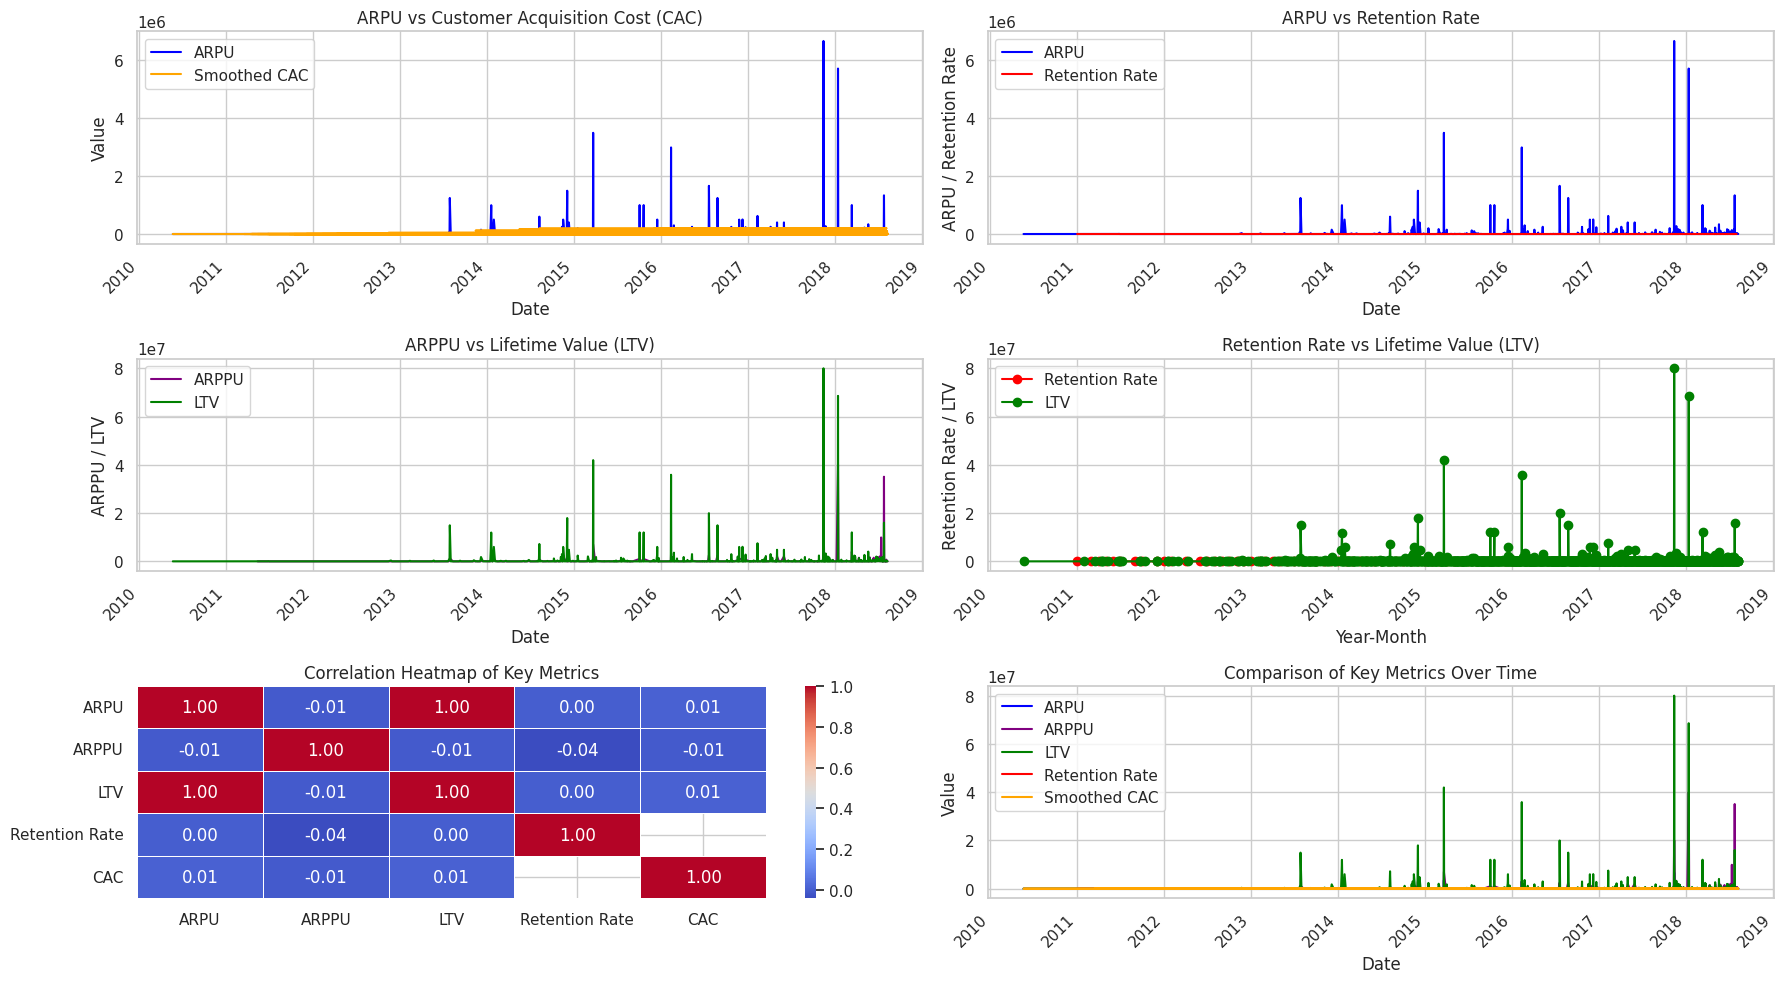

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all previous calculations for DAU, MAU, ARPU, ARPPU, LTV, CAC, and Retention Rate are done.

# Trend Analysis of Key Metrics

plt.figure(figsize=(18, 10))

# Subplot 1: ARPU vs CAC
plt.subplot(3, 2, 1)
plt.plot(arpu['day'], arpu['ARPU'], label='ARPU', color='blue')
plt.plot(df['day'], df['CAC_smooth_clipped'], label='Smoothed CAC', color='orange')
plt.title('ARPU vs Customer Acquisition Cost (CAC)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Subplot 2: ARPU vs Retention Rate
plt.subplot(3, 2, 2)
plt.plot(arpu['day'], arpu['ARPU'], label='ARPU', color='blue')
# Convert 'Year-Month' to datetime for plotting
retention['Year-Month'] = pd.to_datetime(retention['Year-Month'].astype(str), format='%Y-%m')
plt.plot(retention['Year-Month'], retention['Retention_Rate'], label='Retention Rate', color='red')
plt.title('ARPU vs Retention Rate')
plt.xlabel('Date')
plt.ylabel('ARPU / Retention Rate')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Subplot 3: ARPPU vs LTV
plt.subplot(3, 2, 3)
plt.plot(arppu['day'], arppu['ARPPU'], label='ARPPU', color='purple')
plt.plot(ltv['day'], ltv['LTV'], label='LTV', color='green')
plt.title('ARPPU vs Lifetime Value (LTV)')
plt.xlabel('Date')
plt.ylabel('ARPPU / LTV')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Subplot 4: Retention Rate vs LTV
plt.subplot(3, 2, 4)
# Retention vs LTV plot
plt.plot(retention['Year-Month'], retention['Retention_Rate'], marker='o', color='red', label='Retention Rate')
plt.plot(ltv['day'], ltv['LTV'], marker='o', color='green', label='LTV')
plt.title('Retention Rate vs Lifetime Value (LTV)')
plt.xlabel('Year-Month')
plt.ylabel('Retention Rate / LTV')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Subplot 5: Correlation heatmap between key metrics
# Combine the necessary metrics into a single DataFrame for correlation analysis
correlation_data = pd.DataFrame({
    'ARPU': arpu['ARPU'],
    'ARPPU': arppu['ARPPU'],
    'LTV': ltv['LTV'],
    'Retention Rate': retention['Retention_Rate'],
    'CAC': df['CAC_smooth_clipped']
})

# Plot the correlation heatmap
plt.subplot(3, 2, 5)
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Metrics')

# Subplot 6: Comparison of all key metrics over time
plt.subplot(3, 2, 6)
plt.plot(arpu['day'], arpu['ARPU'], label='ARPU', color='blue')
plt.plot(arppu['day'], arppu['ARPPU'], label='ARPPU', color='purple')
plt.plot(ltv['day'], ltv['LTV'], label='LTV', color='green')
plt.plot(retention['Year-Month'], retention['Retention_Rate'], label='Retention Rate', color='red')
plt.plot(df['day'], df['CAC_smooth_clipped'], label='Smoothed CAC', color='orange')
plt.title('Comparison of Key Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlap and center the bottom plots
plt.tight_layout()
plt.show()

**Key Insights**:

---



**1. ARPU vs CAC**: While **ARPU** fluctuates, **CAC** remains stable, indicating that **revenue per user** is growing without increasing acquisition costs.

**2. ARPU vs Retention Rate**: **Retention Rate** remains relatively constant, while **ARPU** shows more variation. This suggests that **increased revenue** is likely driven by **premium users** or better **monetization** rather than retention alone.

**3. ARPPU vs LTV**: **ARPPU** and **LTV** are highly correlated, meaning that increasing **revenue from paying users** directly boosts **long-term value**.

**4. Retention Rate vs LTV**: **Retention Rate** has less impact on **LTV** than **ARPPU**, suggesting that **retaining high-value users** is more crucial than overall retention.

**5. Correlation Heatmap**: **ARPU** and **ARPPU** show a positive correlation with **LTV**, but **Retention Rate** has weaker correlations, highlighting the importance of improving **paying user monetization**.

**Conclusions**:

**1.** Focus on increasing **ARPPU** to drive **LTV**.

**2. Retention** efforts should target **paying users** to enhance **long-term profitability**.

**3. Monitor CAC**: It’s stable and should remain a priority to maintain **cost-efficient user acquisition**.